In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("loan.csv")


In [3]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["ApplicantIncome"].fillna(df["ApplicantIncome"].mean() , inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25460\1586973050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ApplicantIncome"].fillna(df["ApplicantIncome"].mean() , inplace=True)


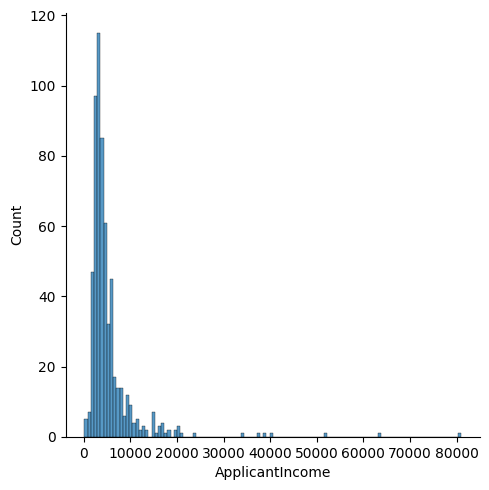

In [7]:
sns.displot(df["ApplicantIncome"])
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler


In [9]:
ss = StandardScaler()
ss.fit(df[["ApplicantIncome"]])

StandardScaler()

In [13]:
ss.transform(df[["ApplicantIncome"]])

array([[ 7.29908229e-02],
       [-1.34411954e-01],
       [-3.93747337e-01],
       [-4.62062470e-01],
       [ 9.77284368e-02],
       [ 2.21831139e-03],
       [-5.03018784e-01],
       [-3.87849628e-01],
       [-2.28939128e-01],
       [ 1.21845703e+00],
       [-3.60982286e-01],
       [-4.75659966e-01],
       [-3.81788093e-01],
       [-5.81654908e-01],
       [-6.72414101e-01],
       [-7.42880841e-02],
       [-2.96107483e-01],
       [-3.10196456e-01],
       [-8.46090753e-02],
       [-4.59277440e-01],
       [ 3.69678365e-01],
       [ 9.03563002e-02],
       [-4.59277440e-01],
       [-3.33951118e-01],
       [-2.76284627e-01],
       [ 6.80946355e-01],
       [-4.26676214e-01],
       [-1.92897571e-01],
       [-6.48987089e-01],
       [-2.70878394e-01],
       [-2.02727086e-01],
       [-3.66388519e-01],
       [-1.16555001e-01],
       [-3.11834708e-01],
       [ 1.16259261e+00],
       [-5.12520649e-01],
       [-5.85750540e-01],
       [-2.84475890e-01],
       [-2.0

In [14]:
df["ApplicantIncome_ss"] = pd.DataFrame(ss.transform(df[["ApplicantIncome"]]),columns=["x"])

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


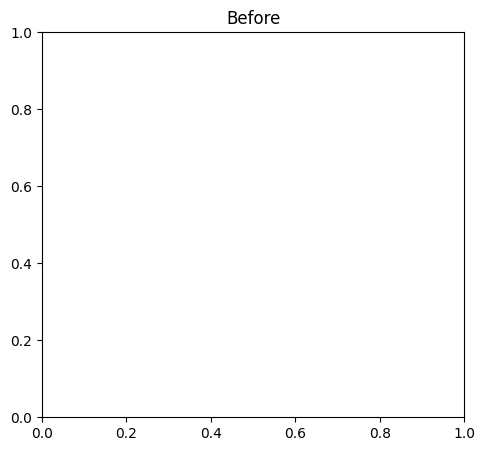

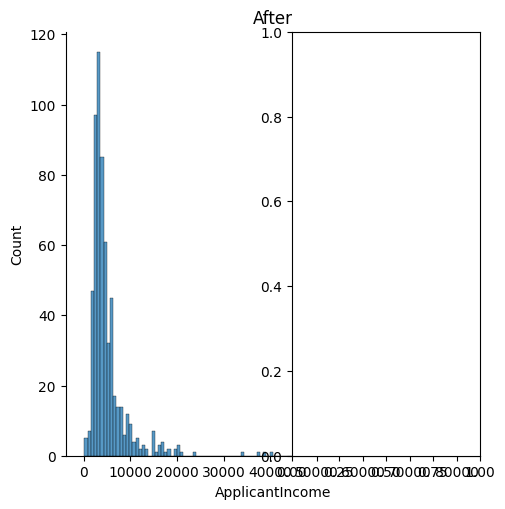

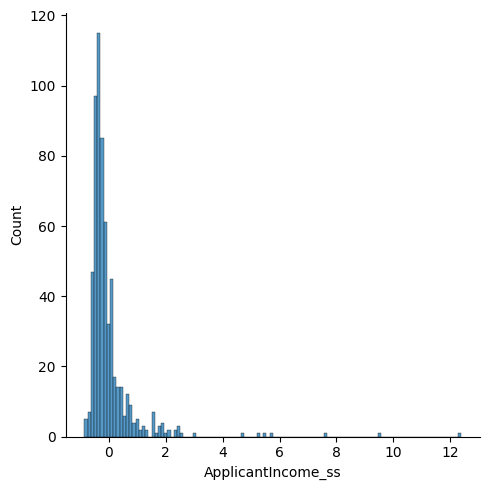

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.displot(df["ApplicantIncome"])
plt.title("After")
plt.subplot(1,2,2)
sns.displot(df["ApplicantIncome_ss"])
plt.show()